<a href="https://colab.research.google.com/github/faiyazabdullah/ML-Research/blob/main/Sentiment140_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator

In [ ]:
# Load the Sentiment140 dataset (Adjust the file path accordingly)
data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding='latin-1', on_bad_lines='skip')

data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Selecting a subset of the data due to computational constraints
data = data.sample(frac=0.1, random_state=42)

# Convert the sentiment values: 0 for negative, 1 for positive
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 4 else 0) # assumes that the neutral sentiments are part of the negative sentiments

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Tokenization and feature extraction using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Remove common English words
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Now, X_train_counts and X_test_counts contain the tokenized and transformed data
# These matrices can be used as input for machine learning algorithms

# **For Raw Dataset**

In [ ]:
# Select a subset of 1000 instances using iloc
subset_size = 1000
subset_data = data.iloc[:subset_size]

# Split the subset data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(subset_data['text'], subset_data['sentiment'], test_size=0.2, random_state=42)

# Tokenization and feature extraction using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Remove common English words
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_counts, y_train)

# Predict using Naive Bayes for training and test data
naive_bayes_train_predictions = naive_bayes_classifier.predict(X_train_counts)
naive_bayes_test_predictions = naive_bayes_classifier.predict(X_test_counts)

# Calculate accuracy for Naive Bayes
accuracy_nb_train = accuracy_score(y_train, naive_bayes_train_predictions)
accuracy_nb_test = accuracy_score(y_test, naive_bayes_test_predictions)

print("Naive Bayes Training Accuracy:", accuracy_nb_train)
print("Naive Bayes Test Accuracy:", accuracy_nb_test)

# Train Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)
decision_tree_classifier.fit(X_train_counts, y_train)

# Predict using Decision Tree for training and test data
decision_tree_train_predictions = decision_tree_classifier.predict(X_train_counts)
decision_tree_test_predictions = decision_tree_classifier.predict(X_test_counts)

# Calculate accuracy for Decision Tree
accuracy_dt_train = accuracy_score(y_train, decision_tree_train_predictions)
accuracy_dt_test = accuracy_score(y_test, decision_tree_test_predictions)

print("Decision Tree Training Accuracy:", accuracy_dt_train)
print("Decision Tree Test Accuracy:", accuracy_dt_test)

# Train Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_counts, y_train)

# Predict using Random Forest for training and test data
random_forest_train_predictions = random_forest_classifier.predict(X_train_counts)
random_forest_test_predictions = random_forest_classifier.predict(X_test_counts)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

# Combine predictions using weighted averaging for Ensemble Learning
weight_naive_bayes = 0.10
weight_random_forest = 0.90

# Get class probabilities predicted by Naive Bayes
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train_counts)[:, 1]
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test_counts)[:, 1]

# Combine predictions using weighted averaging
ensemble_train_spam_prob = (weight_naive_bayes * naive_bayes_train_probabilities +
                            weight_random_forest * random_forest_train_predictions)

ensemble_test_spam_prob = (weight_naive_bayes * naive_bayes_test_probabilities +
                           weight_random_forest * random_forest_test_predictions)

# Threshold probabilities to get binary predictions (0 or 1)
threshold = 0.5
ensemble_train_predictions = (ensemble_train_spam_prob > threshold).astype(int)
ensemble_test_predictions = (ensemble_test_spam_prob > threshold).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y_train, ensemble_train_predictions)
accuracy_ensemble_test = accuracy_score(y_test, ensemble_test_predictions)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Naive Bayes Training Accuracy: 0.97125
Naive Bayes Test Accuracy: 0.76
Decision Tree Training Accuracy: 0.80875
Decision Tree Test Accuracy: 0.725
Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.765
Ensemble Training Accuracy: 1.0
Ensemble Test Accuracy: 0.765


# **Creating enhanced dataset with N.B probabilities**

In [ ]:
# Get class probabilities predicted by Naive Bayes
naive_bayes_probabilities = naive_bayes_classifier.predict_proba(X_train_counts)

# Select a smaller subset of the data
subset_size = 1000
X_train_counts_subset = X_train_counts[:subset_size]
X_test_counts_subset = X_test_counts[:subset_size]

# Add Naive Bayes probabilities as new features to the original dataset
X_train_enriched = np.hstack((X_train_counts_subset.toarray(), naive_bayes_probabilities[:subset_size]))

# Transform test data and add Naive Bayes probabilities as features
X_test_enriched = np.hstack((X_test_counts_subset.toarray(), naive_bayes_classifier.predict_proba(X_test_counts_subset)))

# **N.B with Enriched dataset**

In [ ]:
# Select the first 1000 samples of y_train
y_train_subset = y_train.iloc[:1000]

# Select the first 1000 samples of y_test
y_test_subset = y_test.iloc[:1000]

# Train Naive Bayes classifier on the sparse features
naive_bayes_classifier_ev = MultinomialNB() # ev stands for enriched vector
naive_bayes_classifier_ev.fit(X_train_enriched, y_train_subset)

# Predict using Naive Bayes for training and test data
naive_bayes_ev_train_predictions = naive_bayes_classifier_ev.predict(X_train_enriched)
naive_bayes_ev_test_predictions = naive_bayes_classifier_ev.predict(X_test_enriched)

# Calculate accuracy for Naive Bayes
accuracy_nb_train = accuracy_score(y_train_subset, naive_bayes_ev_train_predictions)
accuracy_nb_test = accuracy_score(y_test_subset, naive_bayes_ev_test_predictions)

print("Naive Bayes with Enriched dataset Training Accuracy:", accuracy_nb_train)
print("Naive Bayes with Enriched dataset Test Accuracy:", accuracy_nb_test)

Naive Bayes with Enriched dataset Training Accuracy: 0.97125
Naive Bayes with Enriched dataset Test Accuracy: 0.76


# **Decision Tree with Enriched dataset**

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)

decision_tree_classifier.fit(X_train_enriched, y_train_subset)

#Predict using Decision Tree for training and test data
decision_tree_train_predictions = decision_tree_classifier.predict(X_train_enriched)
decision_tree_test_predictions = decision_tree_classifier.predict(X_test_enriched)

# Calculate accuracy for Decision Tree
accuracy_dt_train = accuracy_score(y_train_subset, decision_tree_train_predictions)
accuracy_dt_test = accuracy_score(y_test_subset, decision_tree_test_predictions)

print("Decision Tree Training Accuracy:", accuracy_dt_train)
print("Decision Tree Test Accuracy:", accuracy_dt_test)

Decision Tree Training Accuracy: 0.98875
Decision Tree Test Accuracy: 0.73


# **Random Forest with Enriched dataset**

In [ ]:
# Train Random Forest on the enriched dataset
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train_enriched, y_train_subset)

# Predict using the Random Forest model
random_forest_train_predictions = random_forest_classifier.predict(X_train_enriched)
random_forest_test_predictions = random_forest_classifier.predict(X_test_enriched)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train_subset, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test_subset, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.75


# **Ensemble Learning**

In [ ]:
# Predict probabilities using Naive Bayes for training and test data
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train_counts)
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test_counts)

# Extract probabilities for the positive class (spam)
naive_bayes_train_spam_prob = naive_bayes_train_probabilities[:, 1]
naive_bayes_test_spam_prob = naive_bayes_test_probabilities[:, 1]

# Predict probabilities using Random Forest for training and test data
random_forest_train_probabilities = random_forest_classifier.predict_proba(X_train_enriched)
random_forest_test_probabilities = random_forest_classifier.predict_proba(X_test_enriched)

# Extract probabilities for the positive class (spam)
random_forest_train_spam_prob = random_forest_train_probabilities[:, 1]
random_forest_test_spam_prob = random_forest_test_probabilities[:, 1]

#Select a smaller subset to match the size of the naive bayes probabilities
subset_size = 1000
random_forest_train_spam_prob_subset = random_forest_train_spam_prob[:subset_size]
random_forest_test_spam_prob_subset = random_forest_test_spam_prob[:subset_size]

naive_bayes_train_spam_prob_subset = naive_bayes_train_spam_prob[:subset_size]
naive_bayes_test_spam_prob_subset = naive_bayes_test_spam_prob[:subset_size]

# Combine predictions using weighted averaging
weight_naive_bayes = 0.10
weight_random_forest = 0.90

# Ensemble predictions for training data
ensemble_train_spam_prob = (weight_naive_bayes * naive_bayes_train_spam_prob_subset +
                            weight_random_forest * random_forest_train_spam_prob_subset)

# Ensemble predictions for test data
ensemble_test_spam_prob = (weight_naive_bayes * naive_bayes_test_spam_prob_subset +
                           weight_random_forest * random_forest_test_spam_prob_subset)

# Threshold probabilities to get binary predictions (0 or 1)
threshold = 0.5
ensemble_train_predictions = (ensemble_train_spam_prob > threshold).astype(int)
ensemble_test_predictions = (ensemble_test_spam_prob > threshold).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y_train_subset, ensemble_train_predictions)
accuracy_ensemble_test = accuracy_score(y_test_subset, ensemble_test_predictions)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Ensemble Training Accuracy: 1.0
Ensemble Test Accuracy: 0.75


# **Confusion Matrix and Classification Report**
Confusion Matrix summarizes the performance of a machine learning model on a set of test data. And Classification Report summarizes different evaluation metrics like precision, recall, F1-score, and support for each class.

Naive Bayes Classifier:


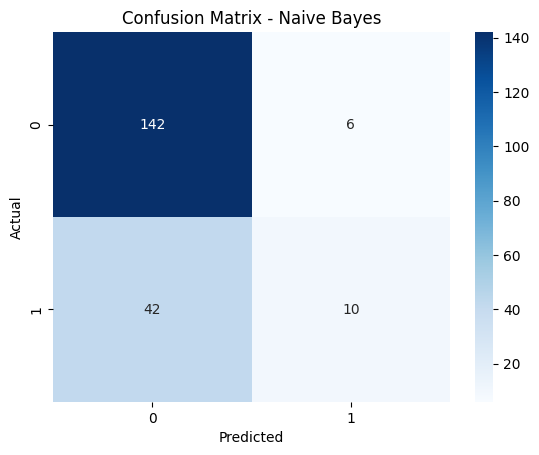

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       148
           1       0.62      0.19      0.29        52

    accuracy                           0.76       200
   macro avg       0.70      0.58      0.57       200
weighted avg       0.73      0.76      0.71       200

Decision Tree Classifier:


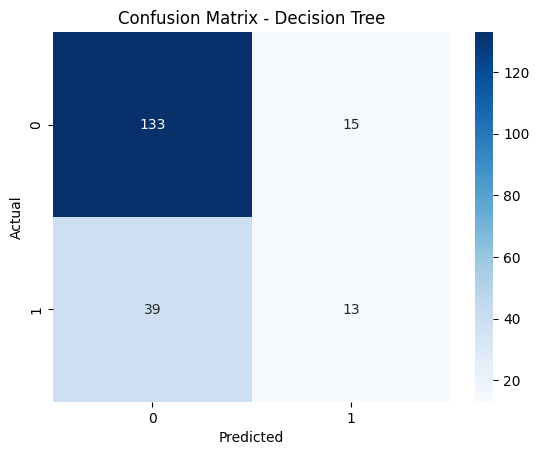

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       148
           1       0.46      0.25      0.33        52

    accuracy                           0.73       200
   macro avg       0.62      0.57      0.58       200
weighted avg       0.69      0.73      0.70       200

Random Forest Classifier:


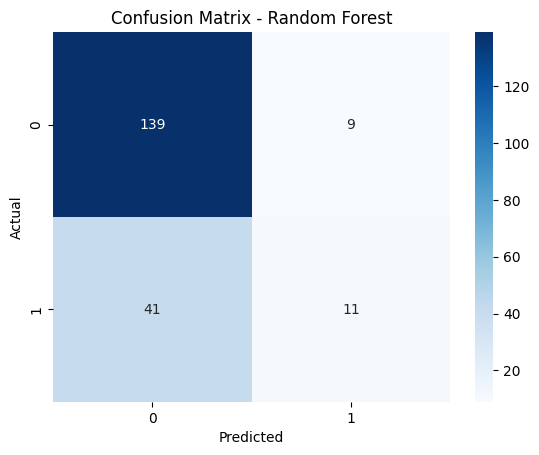

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       148
           1       0.55      0.21      0.31        52

    accuracy                           0.75       200
   macro avg       0.66      0.58      0.58       200
weighted avg       0.71      0.75      0.71       200

Ensemble Learning:


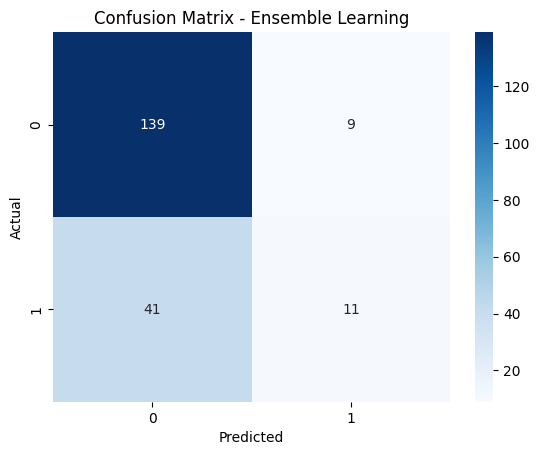

Classification Report - Ensemble Learning:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       148
           1       0.55      0.21      0.31        52

    accuracy                           0.75       200
   macro avg       0.66      0.58      0.58       200
weighted avg       0.71      0.75      0.71       200



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix and Classification Report for Naive Bayes Classifier
print("Naive Bayes Classifier:")
cm_nb = confusion_matrix(y_test_subset, naive_bayes_ev_test_predictions)
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

print("Classification Report - Naive Bayes:")
print(classification_report(y_test_subset, naive_bayes_ev_test_predictions))

# Confusion Matrix and Classification Report for Decision Tree Classifier
print("Decision Tree Classifier:")
cm_dt = confusion_matrix(y_test_subset, decision_tree_test_predictions)
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("Classification Report - Decision Tree:")
print(classification_report(y_test_subset, decision_tree_test_predictions))

# Confusion Matrix and Classification Report for Random Forest Classifier
print("Random Forest Classifier:")
cm_rf = confusion_matrix(y_test_subset, random_forest_test_predictions)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("Classification Report - Random Forest:")
print(classification_report(y_test_subset, random_forest_test_predictions))

# Confusion Matrix and Classification Report for Ensemble Learning
print("Ensemble Learning:")
cm_ensemble = confusion_matrix(y_test_subset, ensemble_test_predictions)
sns.heatmap(cm_ensemble, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Learning')
plt.show()

print("Classification Report - Ensemble Learning:")
print(classification_report(y_test_subset, ensemble_test_predictions))

# **10-fold cross validation**

In [ ]:
# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
nb_scores = cross_val_score(naive_bayes_classifier, X_train_counts, y_train, cv=kf, scoring='accuracy')

print("Naive Bayes Cross-Validation Scores:", nb_scores)
print("Mean Naive Bayes Cross-Validation Accuracy:", np.mean(nb_scores))

# Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)
dt_scores = cross_val_score(decision_tree_classifier, X_train_counts, y_train, cv=kf, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Mean Decision Tree Cross-Validation Accuracy:", np.mean(dt_scores))

# Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(random_forest_classifier, X_train_counts, y_train, cv=kf, scoring='accuracy')

print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Random Forest Cross-Validation Accuracy:", np.mean(rf_scores))

# Ensemble Learning
class EnsembleClassifier(BaseEstimator):
    def __init__(self, nb_weight=0.1, rf_weight=0.9):
        self.nb_weight = nb_weight
        self.rf_weight = rf_weight

    def fit(self, X, y):
        # Train Naive Bayes classifier
        self.nb_classifier = MultinomialNB()
        self.nb_classifier.fit(X, y)

        # Train Random Forest Classifier
        self.rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        self.rf_classifier.fit(X, y)

    def predict(self, X):
        # Get Naive Bayes probabilities for the input data
        nb_probabilities = self.nb_classifier.predict_proba(X)[:, 1]

        # Get Random Forest predictions for the input data
        rf_predictions = self.rf_classifier.predict(X)

        # Combine Naive Bayes probabilities and Random Forest predictions using weighted averaging
        ensemble_predictions = (
            self.nb_weight * nb_probabilities +
            self.rf_weight * rf_predictions
        )

        # Threshold probabilities to get binary predictions (0 or 1)
        threshold = 0.5
        binary_predictions = (ensemble_predictions > threshold).astype(int)
        return binary_predictions

ensemble_classifier = EnsembleClassifier()
ensemble_scores = cross_val_score(ensemble_classifier, X_train_counts, y_train, cv=kf, scoring='accuracy')

print("Ensemble Learning Cross-Validation Scores:", ensemble_scores)
print("Mean Ensemble Learning Cross-Validation Accuracy:", np.mean(ensemble_scores))

Naive Bayes Cross-Validation Scores: [0.675  0.675  0.75   0.75   0.7875 0.7625 0.65   0.775  0.7375 0.7625]
Mean Naive Bayes Cross-Validation Accuracy: 0.7324999999999999
Decision Tree Cross-Validation Scores: [0.7    0.7625 0.8125 0.875  0.75   0.725  0.8    0.75   0.825  0.825 ]
Mean Decision Tree Cross-Validation Accuracy: 0.7825000000000001
Random Forest Cross-Validation Scores: [0.725  0.7875 0.8375 0.8875 0.75   0.7125 0.775  0.7375 0.8375 0.8125]
Mean Random Forest Cross-Validation Accuracy: 0.7862500000000001
Ensemble Learning Cross-Validation Scores: [0.725  0.7875 0.8375 0.8875 0.75   0.7125 0.775  0.7375 0.8375 0.8125]
Mean Ensemble Learning Cross-Validation Accuracy: 0.7862500000000001
